In [432]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

import tensorflow as tf
from tensorflow import keras
import os
import datetime

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [433]:
# 리눅스 한글 설정
plt.rc('font', family = 'NanumGothic')

In [434]:
file = '2013~2023 한국 기온,습도,풍속.csv'

In [435]:
df = pd.read_csv(file, encoding = 'cp949')

In [436]:
df

,지점번호,지점명,일시,평균기온(℃),최고기온(℃),최저기온(℃),평균습도(%rh),평균풍속(m/s)
0,105,강릉,2013-01-01,-1.9,3.8,-6.7,50.6,2.9
1,105,강릉,2013-01-02,-6.0,-1.3,-9.9,29.9,4.4
2,105,강릉,2013-01-03,-7.5,-0.7,-11.1,25.8,4.0
3,105,강릉,2013-01-04,-4.9,1.8,-10.6,31.1,3.2
4,105,강릉,2013-01-05,-1.7,2.8,-5.4,30.4,4.3
...,...,...,...,...,...,...,...,...
62059,184,제주,2023-08-11,29.6,34.1,26.6,64.6,4.0
62060,184,제주,2023-08-12,29.7,33.3,27.2,66.6,2.7
62061,184,제주,2023-08-13,29.2,32.6,26.3,65.3,3.0
62062,184,제주,2023-08-14,28.9,32.3,26.4,69.9,3.4


In [437]:
df.head()

,지점번호,지점명,일시,평균기온(℃),최고기온(℃),최저기온(℃),평균습도(%rh),평균풍속(m/s)
0,105,강릉,2013-01-01,-1.9,3.8,-6.7,50.6,2.9
1,105,강릉,2013-01-02,-6.0,-1.3,-9.9,29.9,4.4
2,105,강릉,2013-01-03,-7.5,-0.7,-11.1,25.8,4.0
3,105,강릉,2013-01-04,-4.9,1.8,-10.6,31.1,3.2
4,105,강릉,2013-01-05,-1.7,2.8,-5.4,30.4,4.3


In [438]:
df.tail()

,지점번호,지점명,일시,평균기온(℃),최고기온(℃),최저기온(℃),평균습도(%rh),평균풍속(m/s)
62059,184,제주,2023-08-11,29.6,34.1,26.6,64.6,4.0
62060,184,제주,2023-08-12,29.7,33.3,27.2,66.6,2.7
62061,184,제주,2023-08-13,29.2,32.6,26.3,65.3,3.0
62062,184,제주,2023-08-14,28.9,32.3,26.4,69.9,3.4
62063,184,제주,2023-08-15,29.4,32.0,27.0,69.9,2.8


In [439]:
df_korea = df.drop(['지점번호', '지점명'], axis = 1).groupby(['일시']).mean()
df_korea.head(10)

,평균기온(℃),최고기온(℃),최저기온(℃),평균습도(%rh),평균풍속(m/s)
일시,,,,,
2013-01-01,-0.76250,4.43750,-6.21250,73.10000,2.33125
2013-01-02,-4.70000,0.54375,-8.98125,53.29375,3.58750
2013-01-03,-8.09375,-3.99375,-11.26250,48.90000,3.40625
2013-01-04,-6.74375,-1.15000,-11.61875,50.25000,2.03125
2013-01-05,-3.81250,1.75625,-9.41875,57.06250,2.28125
2013-01-06,-2.32500,2.52500,-5.73750,57.04375,1.96875
2013-01-07,-2.00625,3.35000,-6.72500,49.62500,1.95000
2013-01-08,-1.22500,3.76875,-5.28750,50.66250,2.15625
2013-01-09,-4.01875,-0.80625,-7.14375,45.38125,3.41250


In [440]:
df_korea.tail(10)

,평균기온(℃),최고기온(℃),최저기온(℃),평균습도(%rh),평균풍속(m/s)
일시,,,,,
2023-08-06,29.40625,33.70000,26.15625,74.78750,1.95000
2023-08-07,29.28750,33.62500,26.05625,74.49375,2.43750
2023-08-08,29.08125,33.11875,25.81875,71.57500,2.92500
2023-08-09,26.48125,28.96250,24.30625,81.06250,3.91875
2023-08-10,23.74375,25.91875,22.36875,88.73125,4.73125
2023-08-11,26.24375,29.97500,22.85625,79.02500,2.83750
2023-08-12,25.86250,29.23125,23.14375,81.25000,1.88125
2023-08-13,26.88750,31.00625,23.51875,77.77500,1.60000
2023-08-14,27.40000,31.66250,24.34375,77.50000,1.77500


((array([-3.56972766, -3.33033678, -3.19818437, ...,  3.19818437,
          3.33033678,  3.56972766]),
  array([-10.50625,  -9.90625,  -9.3625 , ...,  30.73125,  30.75   ,
          30.81875])),
 (9.094958307648389, 14.32800635902724, 0.980865003814996))

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


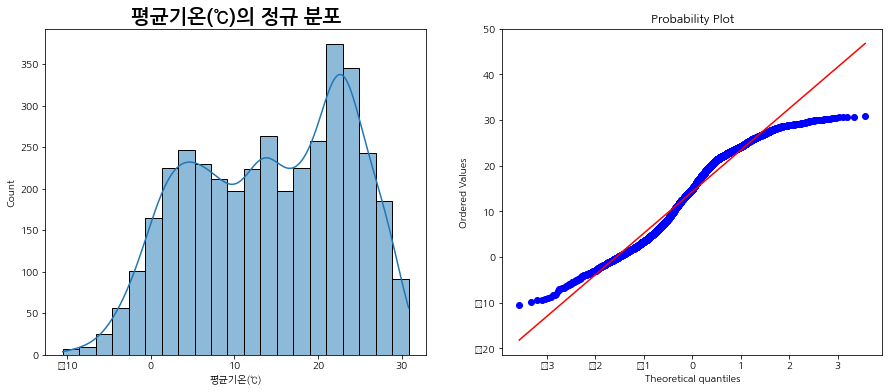

In [441]:
# 우선 종속변수의 분포를 확인

fig, axes = plt.subplots(1,2, figsize = (15,6))

sns.histplot(df_korea['평균기온(℃)'], ax =axes[0], kde=True)
axes[0].set_title('평균기온(℃)의 정규 분포', fontsize = 20, weight='bold')
stats.probplot(df_korea["평균기온(℃)"], dist='norm', fit=True, plot=axes[1])


# 오른쪽 파란색 곡선이 빨간색 직선에 비슷해 질수록 정규분포를 따른다 ==> 그다지 정확하지는 않지만, 얼추 따른다고 생각

((array([-3.56972766, -3.33033678, -3.19818437, ...,  3.19818437,
          3.33033678,  3.56972766]),
  array([-6.75   , -6.2125 , -5.63125, ..., 35.55   , 35.775  , 35.9125 ])),
 (8.977774295898092, 18.995416881498667, 0.9796669519758548))

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


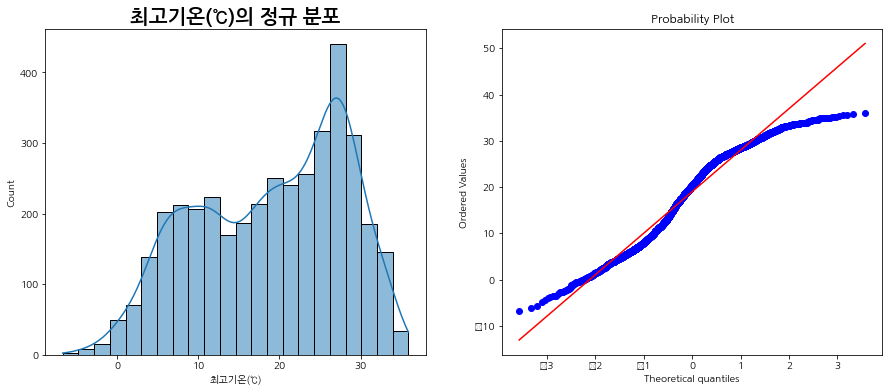

In [442]:
fig, axes = plt.subplots(1,2, figsize = (15,6))

sns.histplot(df_korea['최고기온(℃)'], ax =axes[0], kde=True)
axes[0].set_title('최고기온(℃)의 정규 분포', fontsize = 20, weight='bold')
stats.probplot(df_korea['최고기온(℃)'], dist='norm', fit=True, plot=axes[1])

((array([-3.56972766, -3.33033678, -3.19818437, ...,  3.19818437,
          3.33033678,  3.56972766]),
  array([-14.0125 , -13.89375, -12.95   , ...,  27.275  ,  27.28125,
          27.39375])),
 (9.451826563832375, 10.346755392283232, 0.9808902285789063))

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


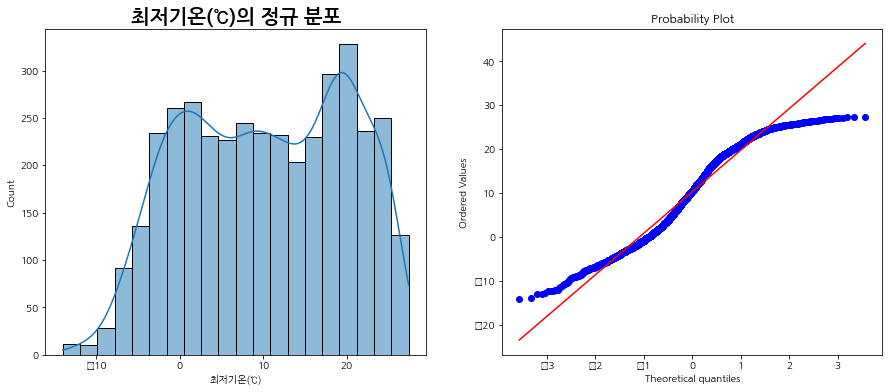

In [443]:
fig, axes = plt.subplots(1,2, figsize = (15,6))

sns.histplot(df_korea['최저기온(℃)'], ax =axes[0], kde=True)
axes[0].set_title('최저기온(℃)의 정규 분포', fontsize = 20, weight='bold')
stats.probplot(df_korea['최저기온(℃)'], dist='norm', fit=True, plot=axes[1])

((array([-3.56972766, -3.33033678, -3.19818437, ...,  3.19818437,
          3.33033678,  3.56972766]),
  array([1.1    , 1.1625 , 1.19375, ..., 5.79375, 5.8375 , 5.925  ])),
 (0.7003152942903524, 2.3620059631225523, 0.951351680881359))

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


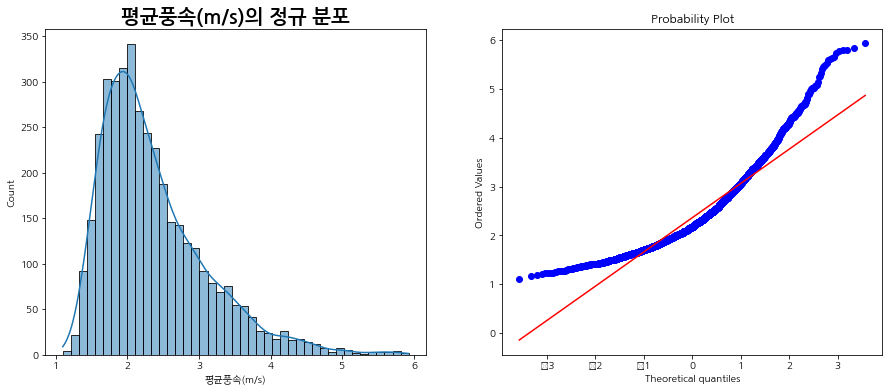

In [444]:
fig, axes = plt.subplots(1,2, figsize = (15,6))

sns.histplot(df_korea['평균풍속(m/s)'], ax =axes[0], kde=True)
axes[0].set_title('평균풍속(m/s)의 정규 분포', fontsize = 20, weight='bold')
stats.probplot(df_korea['평균풍속(m/s)'], dist='norm', fit=True, plot=axes[1])

In [445]:
# 평균 풍속은 아래로 볼록한 형태를 보인다.

((array([-3.56972766, -3.33033678, -3.19818437, ...,  3.19818437,
          3.33033678,  3.56972766]),
  array([32.15   , 32.5    , 32.71875, ..., 94.975  , 95.21875, 96.025  ])),
 (13.113876912292294, 66.77656848844205, 0.9929046245201671))

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


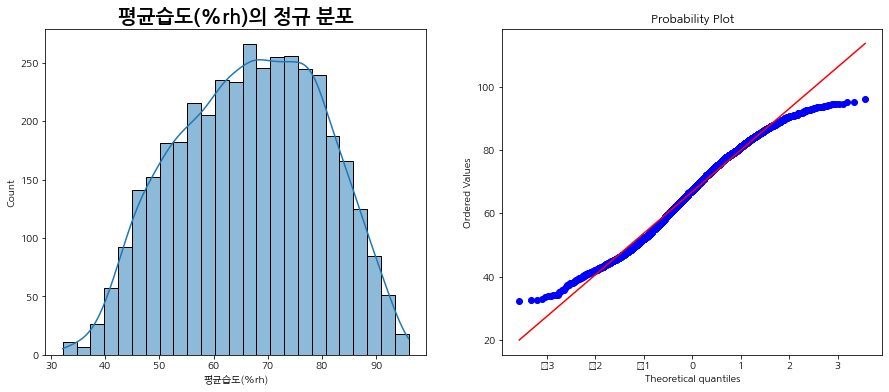

In [446]:
fig, axes = plt.subplots(1,2, figsize = (15,6))

sns.histplot(df_korea['평균습도(%rh)'], ax =axes[0], kde=True)
axes[0].set_title('평균습도(%rh)의 정규 분포', fontsize = 20, weight='bold')
stats.probplot(df_korea['평균습도(%rh)'], dist='norm', fit=True, plot=axes[1])

## 기온데이터만 가지고 예측 모델 만들기
#### 월별에서 일별이 되었을 때, 할 수 있는 것이 무엇이 있을까?
#### 1. 1 ~ 6일의 기온으로 다음 7일을 예측하는 모델을 만들자는 생각
#### <span style='background-color:#fff5b1'>1번의 생각은 몇년 후를 예측하기에는 정확도가 많이 떨어진다. 따라서 2013-01-01 ~ 2022-01-01로 2023-01-01을 예측하는 식으로 가보자</span>
#### 2. 2022년까지의 데이터를 가지고 2023년 1년을 에측하는 모델을 만들어보자
#### 2-1. train data = 2013 ~ 2022, test data = 2023
#### 3. 일단 train 및 test 일별데이터가 어떻게 분포하는지 시각화 필요

In [447]:
# 윤달 drop
df_korea.drop(['2016-02-29', '2020-02-29'], axis = 0, inplace = True)

In [448]:
df_korea = df_korea.reset_index()

In [449]:
df_korea.loc[:, '일시'] = pd.to_datetime(df_korea.loc[:, '일시']).dt.strftime('%Y-%m-%d')
df_korea

,일시,평균기온(℃),최고기온(℃),최저기온(℃),평균습도(%rh),평균풍속(m/s)
0,2013-01-01,-0.76250,4.43750,-6.21250,73.10000,2.33125
1,2013-01-02,-4.70000,0.54375,-8.98125,53.29375,3.58750
2,2013-01-03,-8.09375,-3.99375,-11.26250,48.90000,3.40625
3,2013-01-04,-6.74375,-1.15000,-11.61875,50.25000,2.03125
4,2013-01-05,-3.81250,1.75625,-9.41875,57.06250,2.28125
...,...,...,...,...,...,...
3872,2023-08-11,26.24375,29.97500,22.85625,79.02500,2.83750
3873,2023-08-12,25.86250,29.23125,23.14375,81.25000,1.88125
3874,2023-08-13,26.88750,31.00625,23.51875,77.77500,1.60000
3875,2023-08-14,27.40000,31.66250,24.34375,77.50000,1.77500


In [450]:
df_korea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   일시         3877 non-null   object 
 1   평균기온(℃)    3877 non-null   float64
 2   최고기온(℃)    3877 non-null   float64
 3   최저기온(℃)    3877 non-null   float64
 4   평균습도(%rh)  3877 non-null   float64
 5   평균풍속(m/s)  3877 non-null   float64
dtypes: float64(5), object(1)
memory usage: 181.9+ KB


In [451]:
filter1 = df_korea['일시'] == '2023-01-01'
filter2 = df_korea['일시'] == '2018-01-01'
test_data = df_korea.iloc[df_korea[filter1].index[0]:]
val_data = df_korea.iloc[df_korea[filter2].index[0]:df_korea[filter1].index[0]]
train_data = df_korea.iloc[:df_korea[filter2].index[0]]

In [452]:
train_data = train_data.set_index('일시')
test_data = test_data.set_index('일시')
val_data = val_data.set_index('일시')

In [453]:
train_data = round(train_data.iloc[:, :], 1)
test_data = round(test_data.iloc[:, :], 1)
val_data = round(val_data.iloc[:, :], 1)

In [454]:
train_data, val_data, test_data

(            평균기온(℃)  최고기온(℃)  최저기온(℃)  평균습도(%rh)  평균풍속(m/s)
 일시                                                         
 2013-01-01     -0.8      4.4     -6.2       73.1        2.3
 2013-01-02     -4.7      0.5     -9.0       53.3        3.6
 2013-01-03     -8.1     -4.0    -11.3       48.9        3.4
 2013-01-04     -6.7     -1.2    -11.6       50.2        2.0
 2013-01-05     -3.8      1.8     -9.4       57.1        2.3
 ...             ...      ...      ...        ...        ...
 2017-12-27     -2.8      1.2     -6.3       35.6        2.9
 2017-12-28      0.3      4.1     -4.3       47.6        1.9
 2017-12-29      4.2      8.6      0.0       67.0        1.8
 2017-12-30      4.5      8.1      1.1       74.2        1.5
 2017-12-31      3.1      6.4      0.1       53.7        3.1
 
 [1825 rows x 5 columns],
             평균기온(℃)  최고기온(℃)  최저기온(℃)  평균습도(%rh)  평균풍속(m/s)
 일시                                                         
 2018-01-01      1.2      5.7     -2.4       46.9        

In [455]:
tr_temp = train_data['평균기온(℃)']
te_temp = test_data['평균기온(℃)']
val_temp = val_data['평균기온(℃)']

In [456]:
train = list(train_data['평균기온(℃)'])
test = list(test_data['평균기온(℃)'])
val = list(val_data['평균기온(℃)'])
train = {0 : train}
test = {0 : test}
val = {0 : val}
tr_temp = pd.DataFrame(train)
te_temp = pd.DataFrame(test) 
val_temp = pd.DataFrame(val)
print(tr_temp)

        0
0    -0.8
1    -4.7
2    -8.1
3    -6.7
4    -3.8
...   ...
1820 -2.8
1821  0.3
1822  4.2
1823  4.5
1824  3.1

[1825 rows x 1 columns]


In [457]:
def maketimeSeries(df, n_in = 6):
    for i in range(1, n_in+1):
        df[i] = df[i-1].shift(1)
    return df

In [458]:
train = maketimeSeries(tr_temp, 24)

In [459]:
val = maketimeSeries(val_temp, 24)

In [460]:
test = maketimeSeries(te_temp, 24)

In [461]:
# train의 결측 행 제거
train = train.dropna()
train = train.reset_index(drop = True)

val = val.dropna()
val = val.reset_index(drop = True)

test = test.dropna()
test = test.reset_index(drop = True)

In [462]:
x_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]
x_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]
x_val = val.iloc[:, 1:]
y_val = val.iloc[:, 0]

In [463]:
x_val

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
0,-9.4,-5.5,3.9,2.9,2.8,2.8,4.8,5.2,5.5,6.1,...,-3.4,-0.5,3.4,1.7,0.8,1.0,-0.7,-0.3,1.7,1.2
1,-8.8,-9.4,-5.5,3.9,2.9,2.8,2.8,4.8,5.2,5.5,...,-7.0,-3.4,-0.5,3.4,1.7,0.8,1.0,-0.7,-0.3,1.7
2,-9.3,-8.8,-9.4,-5.5,3.9,2.9,2.8,2.8,4.8,5.2,...,-6.8,-7.0,-3.4,-0.5,3.4,1.7,0.8,1.0,-0.7,-0.3
3,-5.5,-9.3,-8.8,-9.4,-5.5,3.9,2.9,2.8,2.8,4.8,...,-1.5,-6.8,-7.0,-3.4,-0.5,3.4,1.7,0.8,1.0,-0.7
4,-1.8,-5.5,-9.3,-8.8,-9.4,-5.5,3.9,2.9,2.8,2.8,...,1.7,-1.5,-6.8,-7.0,-3.4,-0.5,3.4,1.7,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,-0.9,-1.8,-5.0,-6.4,-3.1,2.6,0.2,-3.4,-5.9,-3.1,...,4.4,4.4,5.2,6.3,5.4,5.9,2.6,0.4,1.9,5.0
1797,0.3,-0.9,-1.8,-5.0,-6.4,-3.1,2.6,0.2,-3.4,-5.9,...,4.0,4.4,4.4,5.2,6.3,5.4,5.9,2.6,0.4,1.9
1798,0.2,0.3,-0.9,-1.8,-5.0,-6.4,-3.1,2.6,0.2,-3.4,...,-4.0,4.0,4.4,4.4,5.2,6.3,5.4,5.9,2.6,0.4
1799,-0.5,0.2,0.3,-0.9,-1.8,-5.0,-6.4,-3.1,2.6,0.2,...,-0.2,-4.0,4.0,4.4,4.4,5.2,6.3,5.4,5.9,2.6


In [464]:
x_train = x_train[[24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]]
x_val = x_val[[24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]]
x_test = x_test[[24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]]

In [465]:
x_train = np.reshape(x_train, (x_train.shape[0], (x_train.shape[1]), 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
y_val = np.reshape(y_val, (y_val.shape[0], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = np.reshape(y_test, (y_test.shape[0], 1))

In [466]:
x_train

array([[[-0.8],
        [-4.7],
        [-8.1],
        ...,
        [ 4.4],
        [ 3.3],
        [ 1.6]],

       [[-4.7],
        [-8.1],
        [-6.7],
        ...,
        [ 3.3],
        [ 1.6],
        [-3.7]],

       [[-8.1],
        [-6.7],
        [-3.8],
        ...,
        [ 1.6],
        [-3.7],
        [-4.3]],

       ...,

       [[-1.2],
        [ 2.4],
        [ 4. ],
        ...,
        [ 0.3],
        [-2.8],
        [ 0.3]],

       [[ 2.4],
        [ 4. ],
        [-0.2],
        ...,
        [-2.8],
        [ 0.3],
        [ 4.2]],

       [[ 4. ],
        [-0.2],
        [ 2.4],
        ...,
        [ 0.3],
        [ 4.2],
        [ 4.5]]])

In [467]:
m_lstm = keras.Sequential([
    keras.layers.LSTM(64, input_shape=(x_train.shape[1], 1),
                      activation='relu', return_sequences = True, kernel_regularizer="l2"),
    keras.layers.LSTM(32, activation='relu', kernel_regularizer="l2"),
    keras.layers.Dense(16, activation="relu", kernel_regularizer="l2"),
    keras.layers.Dense(1)
])
m_lstm.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_97 (LSTM)              (None, 24, 64)            16896     
                                                                 
 lstm_98 (LSTM)              (None, 32)                12416     
                                                                 
 dense_66 (Dense)            (None, 16)                528       
                                                                 
 dense_67 (Dense)            (None, 1)                 17        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [473]:
m_lstm.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.001),
             loss = keras.losses.MeanSquaredError(),
             metrics = ['mae'])

In [469]:
w = m_lstm.fit(x_train, y_train, epochs = 50, shuffle=False, validation_data = (x_val, y_val))

Epoch 1/50
57/57 [==============================] - 3s 15ms/step - loss: 199.7323 - mae: 12.1682 - val_loss: 98.8801 - val_mae: 8.5824
Epoch 2/50
57/57 [==============================] - 1s 11ms/step - loss: 65.1857 - mae: 6.4999 - val_loss: 46.0789 - val_mae: 5.4865
Epoch 3/50
57/57 [==============================] - 1s 11ms/step - loss: 33.1141 - mae: 4.4280 - val_loss: 26.4901 - val_mae: 3.9921
Epoch 4/50
57/57 [==============================] - 1s 11ms/step - loss: 19.6722 - mae: 3.3498 - val_loss: 15.7571 - val_mae: 2.9807
Epoch 5/50
57/57 [==============================] - 1s 11ms/step - loss: 14.3020 - mae: 2.8327 - val_loss: 13.6232 - val_mae: 2.7957
Epoch 6/50
57/57 [==============================] - 1s 11ms/step - loss: 12.3137 - mae: 2.6126 - val_loss: 11.8158 - val_mae: 2.5490
Epoch 7/50
57/57 [==============================] - 1s 11ms/step - loss: 10.7634 - mae: 2.4007 - val_loss: 11.1626 - val_mae: 2.4506
Epoch 8/50
57/57 [==============================] - 1s 11ms/step - 

In [470]:
m_lstm.save('m2_lstm_adam.h5')

In [471]:
m_lstm_Adam = tf.keras.models.load_model('m2_lstm_adam.h5')

In [472]:
m_lstm_Adam.evaluate(x_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 4.0795 - mae: 1.4706


[4.079519271850586, 1.4706016778945923]

In [383]:
pred = m_lstm_Adam.predict(x_test).reshape(203,)
pred.shape

7/7 [==============================] - 0s 3ms/step


(203,)

In [424]:
test_data = test_data.reset_index()
test_data['일시'] =  pd.to_datetime(test_data['일시'])

Text(0.5, 1.0, 'test data : 대한민국 국내 기온 변화 (2023-01-01 ~ 2023-08-10)')

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


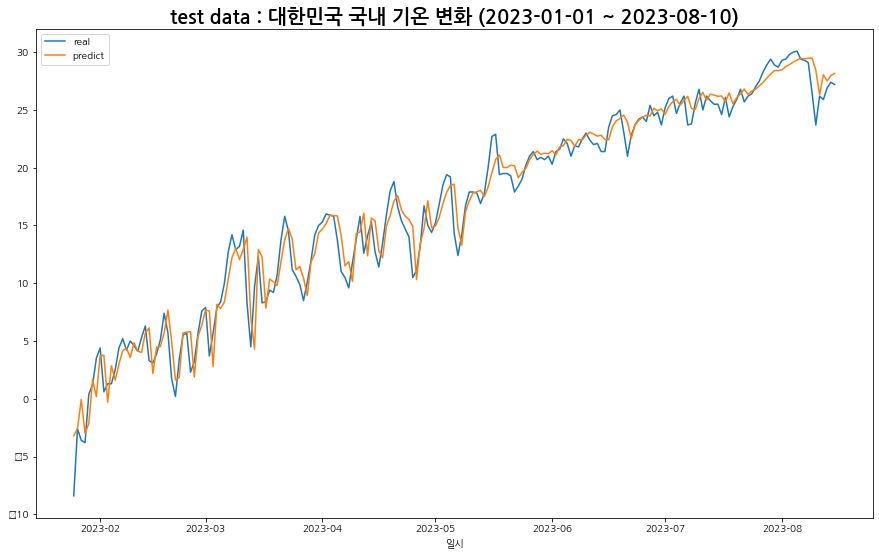

In [431]:
fig, axe = plt.subplots(figsize = (15,9))
window = 10
sns.lineplot(x = test_data['일시'][24:], y = y_test[:, 0], label = 'real')
sns.lineplot(x = test_data['일시'][24:], y = pred, label = 'predict')
#sns.scatterplot(x = temp_real['일시'].iloc[-1], y = next_pred, color = 'r', marker = 'o', label = '2023/08/10의 기온 예측점')
#axe.set_xticks(len(y_test).dt.strftime('%Y-%m').iloc[window::10])
#axe.set_xticklabels(len(y_test).dt.strftime('%Y-%m').iloc[window::10], rotation = -45, weight='bold')
axe.set_title('test data : 대한민국 국내 기온 변화 (2023-01-01 ~ 2023-08-10)', fontsize = 20, weight='bold')